In [1]:
import pickle
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab, re

In [2]:
robustness = pickle.load(open("../results/robustness.results", "rb"))
print(sorted(robustness.keys())[:5])
sorted(robustness.keys())[-5:]

[(50, 42), (50, 85), (50, 128), (50, 170), (50, 212)]


[(500, 255), (500, 298), (500, 340), (500, 382), (500, 425)]

In [3]:
robustness[(50, 42)]["DeepSelect"]

{'MAE-accuracy': 0.6790123456790124,
 'f1_score w.avg': 0.02222222222222222,
 'log loss': 11.17145406503408}

In [4]:
robustness[(50, 42)]

{'DeepSelect': {'MAE-accuracy': 0.6790123456790124,
  'f1_score w.avg': 0.02222222222222222,
  'log loss': 11.17145406503408},
 'DeepSelect (regclass)': {'MAE-accuracy': 0.5738636363636364,
  'f1_score w.avg': 0.047667530544242866,
  'log loss': nan},
 'Logistic Regression': {'MAE-accuracy': 0.6434659090909092,
  'f1_score w.avg': 0.05778388278388278,
  'log loss': nan},
 'MLP': {'MAE-accuracy': 0.6434659090909092,
  'f1_score w.avg': 0.07361111111111111,
  'log loss': nan},
 'RandomForest': {'MAE-accuracy': 0.6661931818181819,
  'f1_score w.avg': 0.1291954022988506,
  'log loss': nan}}

In [5]:
def plot_robustness(robustness, accuracy_metric="MAE-accuracy", models=None):
    if not models:
        models = list(robustness[list(robustness.keys())[0]].keys())
    colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(models))]
    colors = {models[i]:colors[i] for i in range(len(models))}


    x = sorted(set([i[0] for i in robustness.keys()]))
    y = sorted(set([i[1] for i in robustness.keys()]))
    X, Y = np.meshgrid(x, y)
    for model in sorted(models):
        Z = np.array([[0. for i in range(len(x))] for j in range(len(y))])
        for i, en in enumerate(x):
            for j, tr in enumerate(y):
                Z[i][j] = robustness[(en,tr)][model][accuracy_metric]

        fig = pylab.figure(figsize=(12, 7))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color=colors[model], alpha=0.7)
        ax.set_title(model, y=1.1, fontsize=20)
        ax.set_xlabel("Number of English Reviews")
        pylab.xlim([min(x), max(x)])
        pylab.xticks(x)
        ax.set_ylabel("Number of Turkish Reviews")
        ax.set_zlabel(accuracy_metric)
        pylab.ylim([min(y), max(y)])
        pylab.yticks(y)

## MAE-accuracy

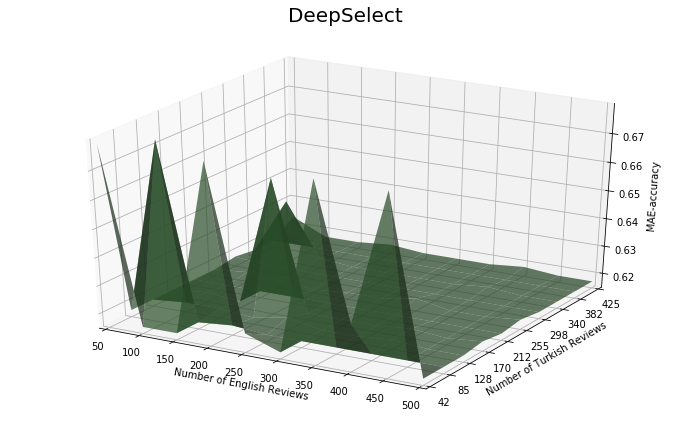

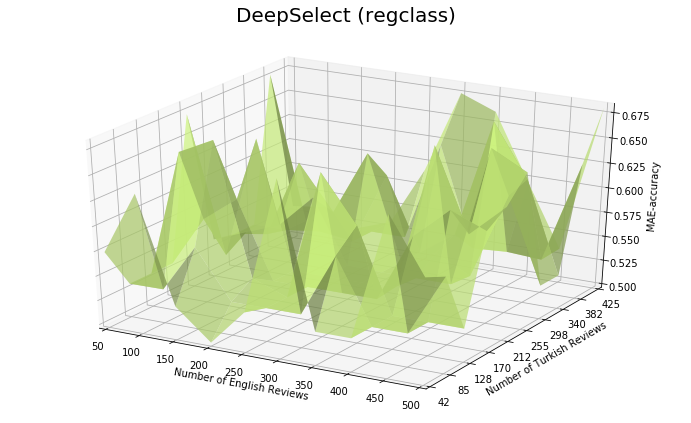

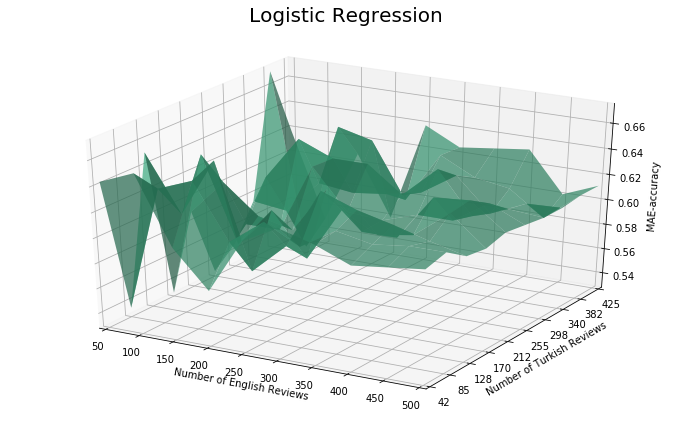

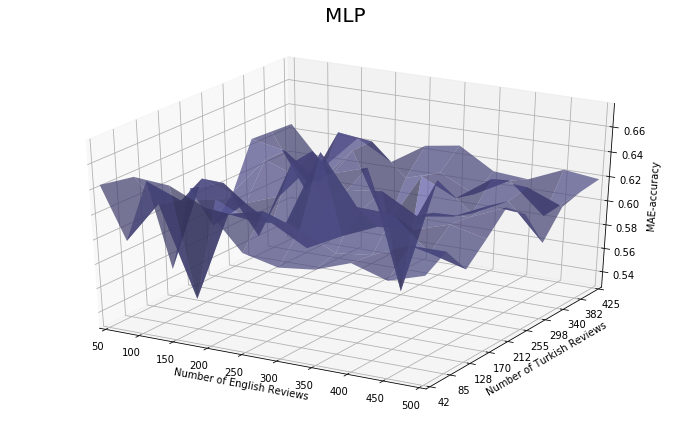

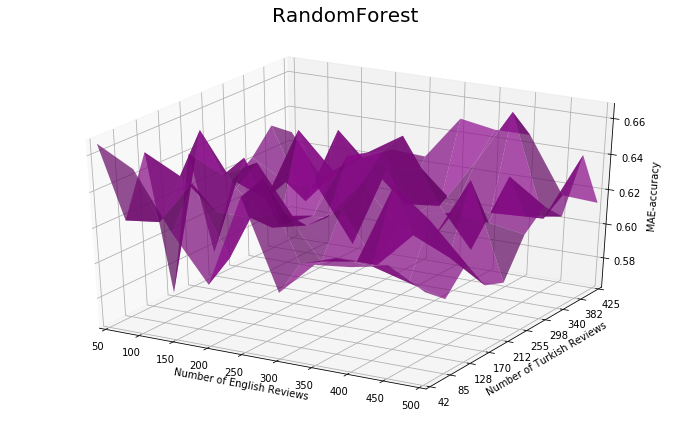

In [6]:
plot_robustness(robustness)

## Cross Entropy

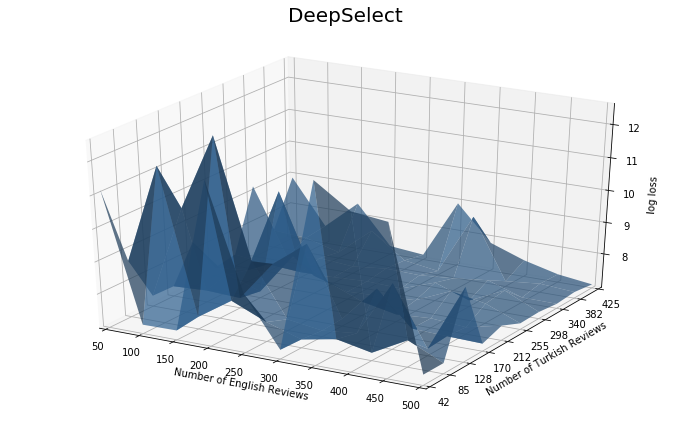

In [7]:
plot_robustness(robustness, accuracy_metric="log loss", models=["DeepSelect"])

# Using three labels instead of 10
### label = 3   if review_score > 7
### label = 2   if 7 >= review_score >= 4
### label = 1  if review_score < 4

In [8]:
robustness_tri = pickle.load(open("../results/robustness_tri.results", "rb"))
print(sorted(robustness_tri.keys())[:5])
sorted(robustness_tri.keys())[-5:]

[(50, 42), (50, 85), (50, 128), (50, 170), (50, 212)]


[(500, 255), (500, 298), (500, 340), (500, 382), (500, 425)]

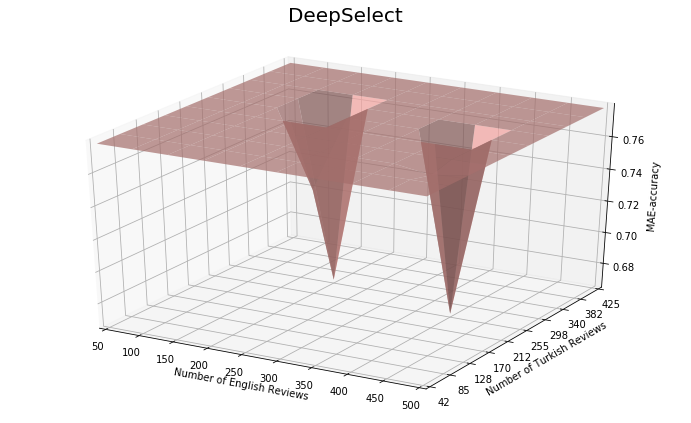

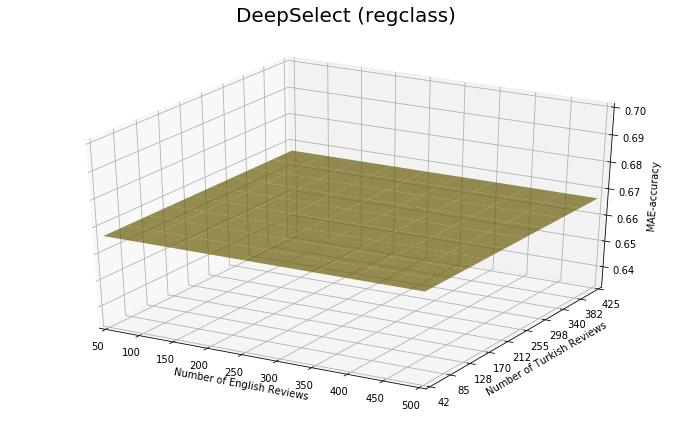

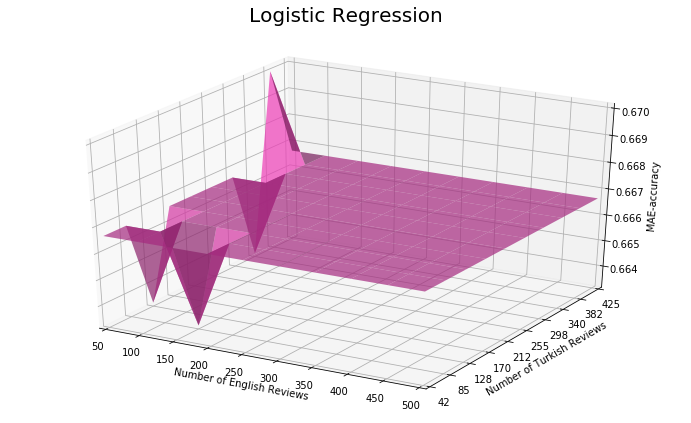

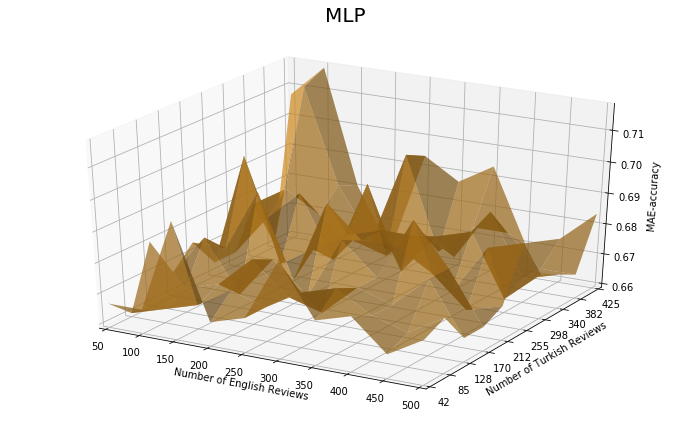

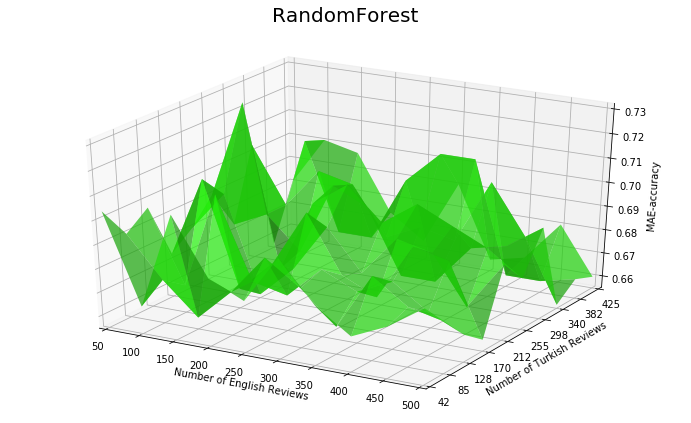

In [9]:
plot_robustness(robustness_tri)

## Cross Entropy

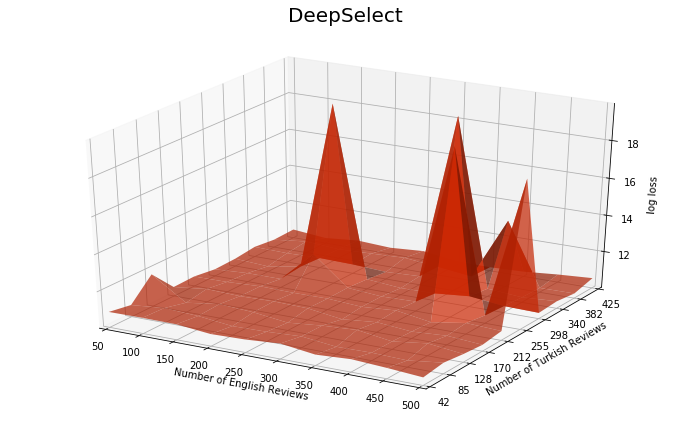

In [10]:
plot_robustness(robustness_tri, accuracy_metric="log loss", models=["DeepSelect"])